In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',False)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('data_bersih.csv')
df = df.drop(['Unnamed: 0', 'index'], axis = 1)
df.head()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,kecamatan,garasi,kolam_renang,taman,gym,jumlah_lantai,listrik
0,5,6,353.0,155.0,6.700000e+09,Mampang Prapatan,True,True,False,False,2,6600.0
1,4,4,90.0,60.0,1.299000e+09,Cilandak,True,False,False,False,2,2200.0
2,4,6,160.0,109.0,2.300000e+09,Kebayoran Baru,True,False,False,False,2,3500.0
3,3,4,125.0,72.0,3.149480e+09,Mampang Prapatan,True,False,True,False,2,2200.0
4,3,4,90.0,87.0,1.210000e+09,Jagakarsa,True,True,False,False,2,2200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    13514 non-null  int64  
 1   kamar_tidur    13514 non-null  int64  
 2   luas_bangunan  13514 non-null  float64
 3   luas_tanah     13514 non-null  float64
 4   harga          13514 non-null  float64
 5   kecamatan      13514 non-null  object 
 6   garasi         13514 non-null  bool   
 7   kolam_renang   13514 non-null  bool   
 8   taman          13514 non-null  bool   
 9   gym            13514 non-null  bool   
 10  jumlah_lantai  13514 non-null  int64  
 11  listrik        13514 non-null  float64
dtypes: bool(4), float64(4), int64(3), object(1)
memory usage: 897.5+ KB


In [4]:
num = [i for i in df.columns if df[i].dtypes in ['int64', 'float']]
cat = [i for i in df.columns if df[i].dtypes in ['O', 'bool']]

In [5]:
print(num)
print(cat)

['kamar_mandi', 'kamar_tidur', 'luas_bangunan', 'luas_tanah', 'harga', 'jumlah_lantai', 'listrik']
['kecamatan', 'garasi', 'kolam_renang', 'taman', 'gym']


kamar_mandi


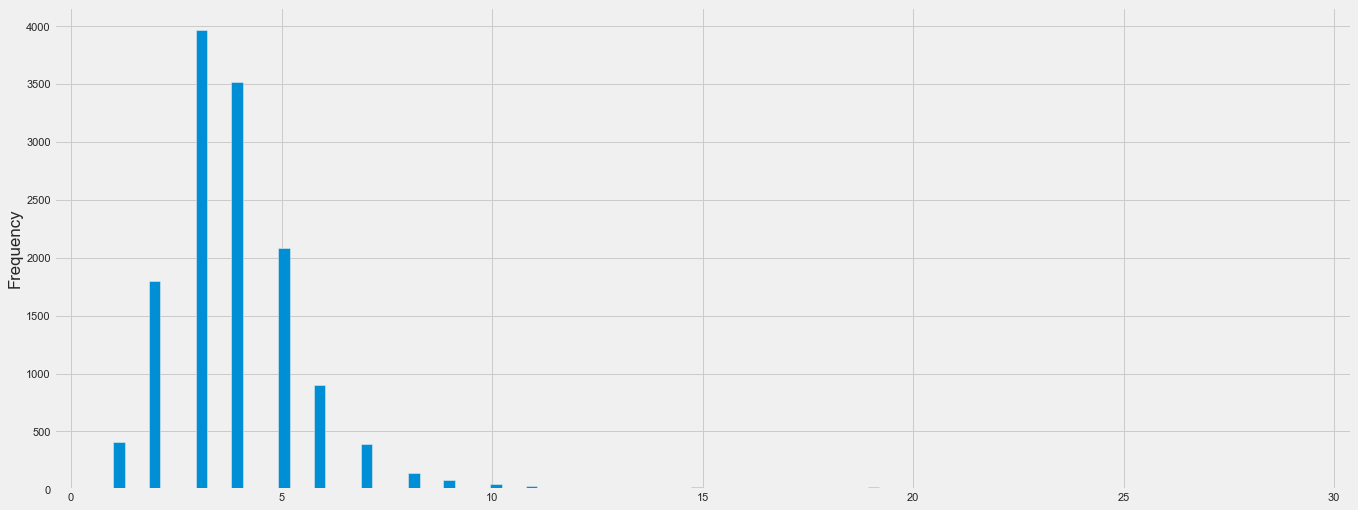

kamar_tidur


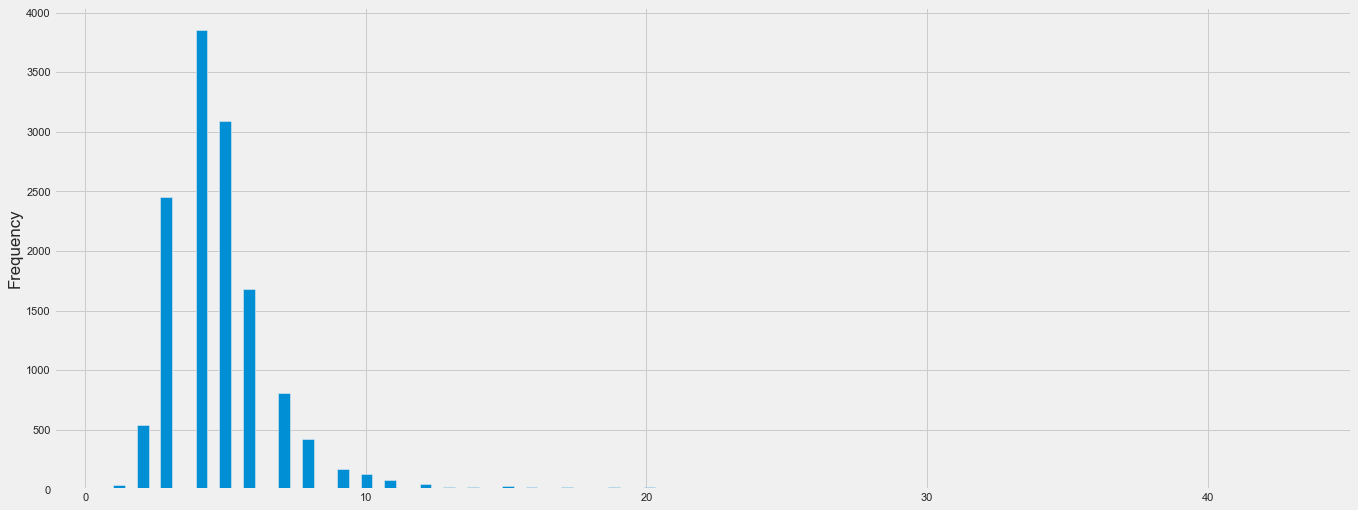

luas_bangunan


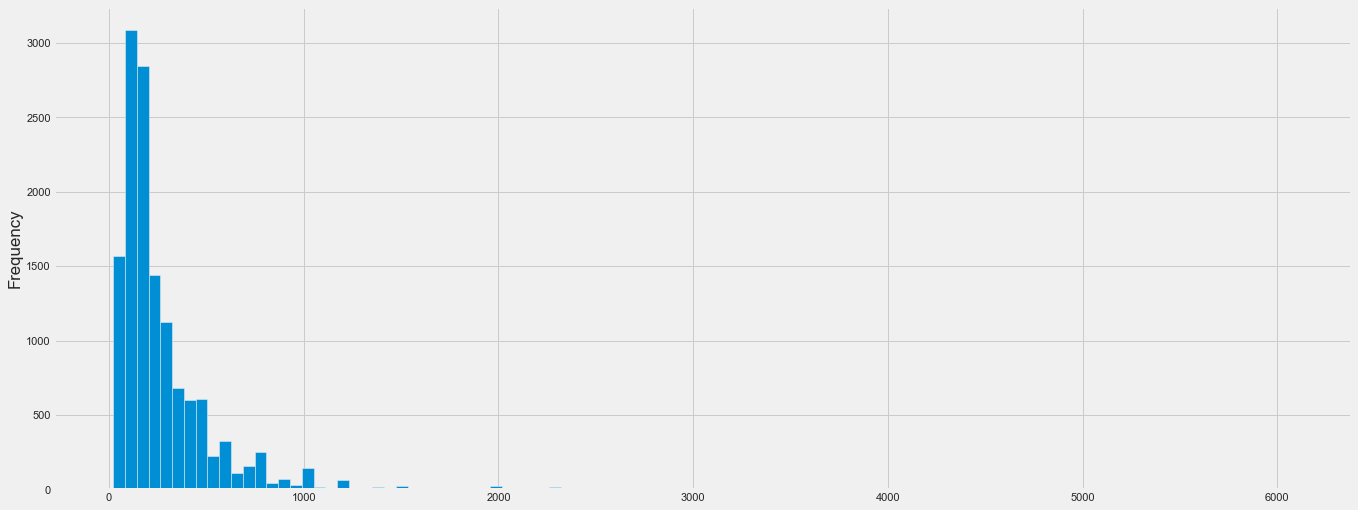

luas_tanah


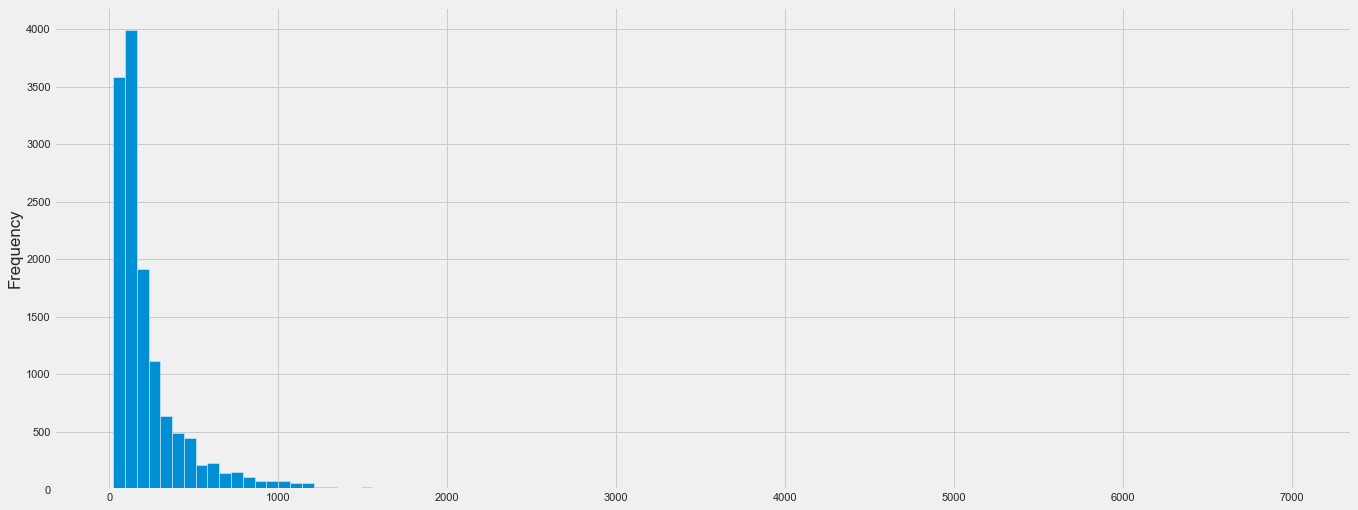

harga


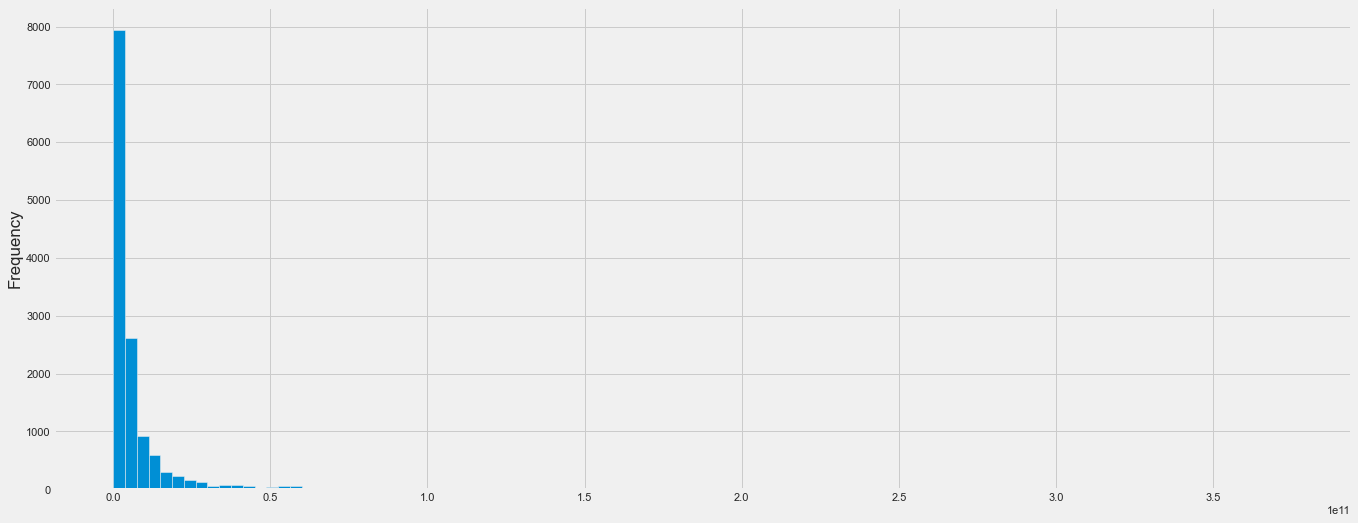

jumlah_lantai


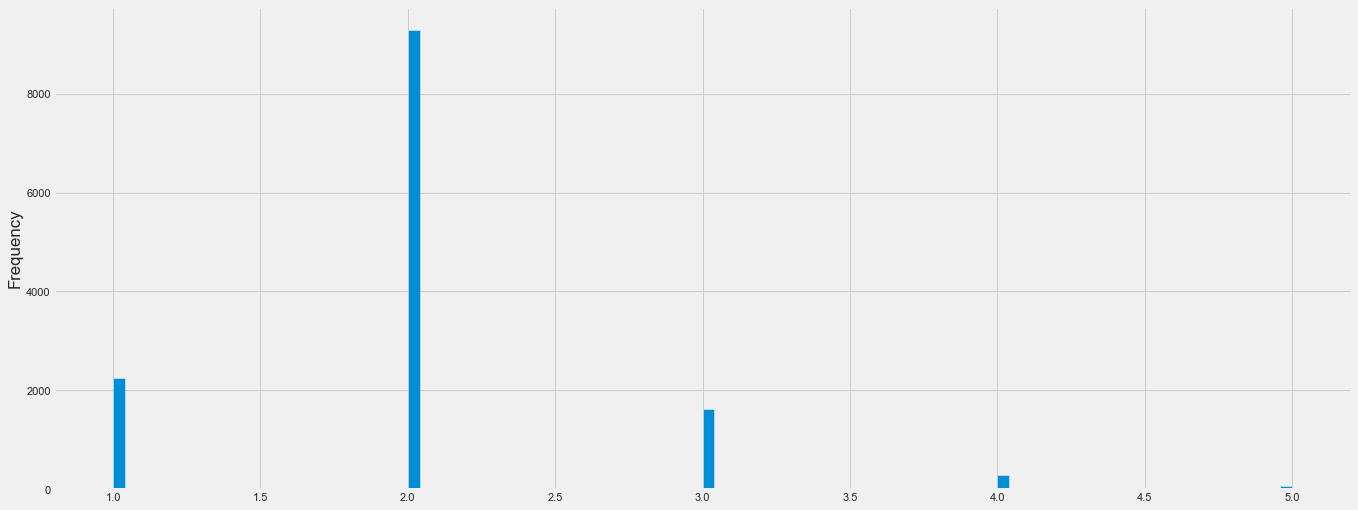

listrik


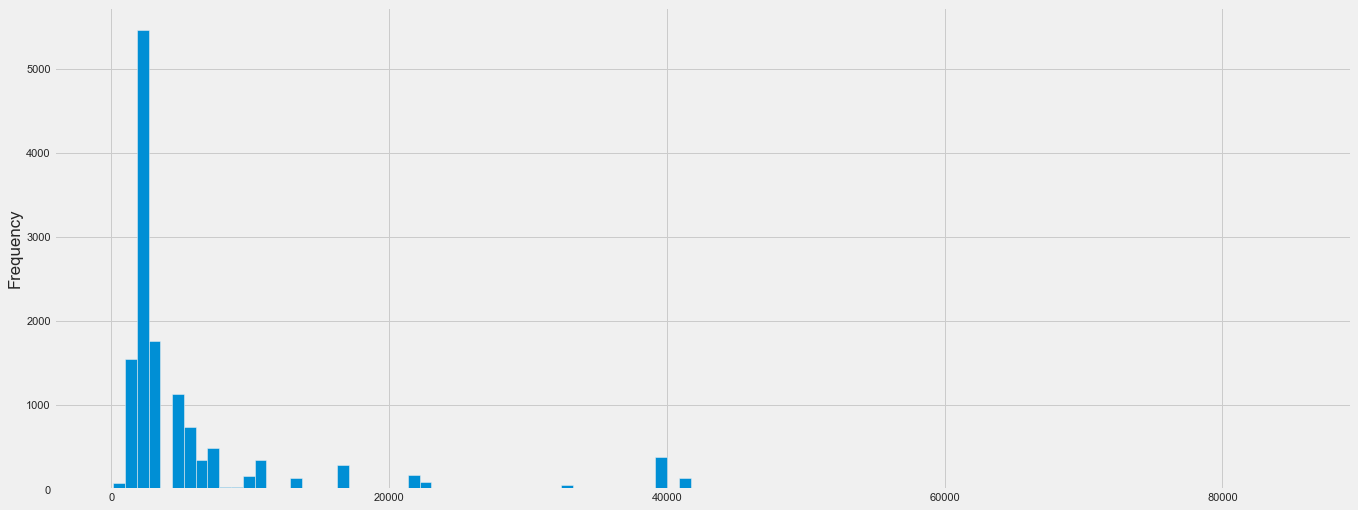

In [6]:
for i in num:
    print(i)
    df[i].plot.hist(bins=100)
    plt.show()
    

kamar_mandi


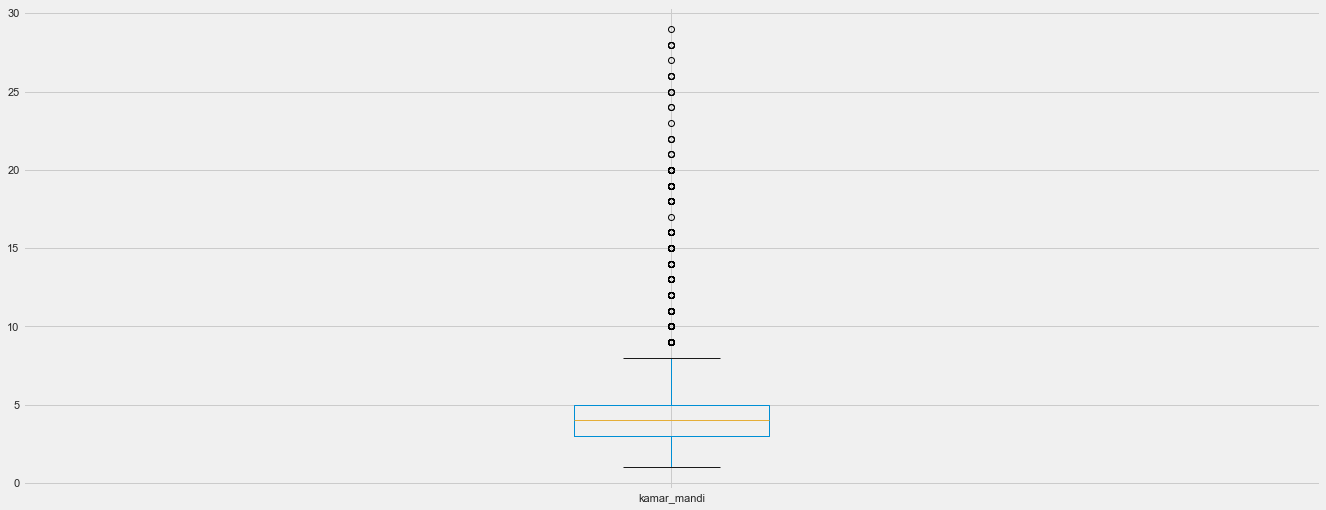

kamar_tidur


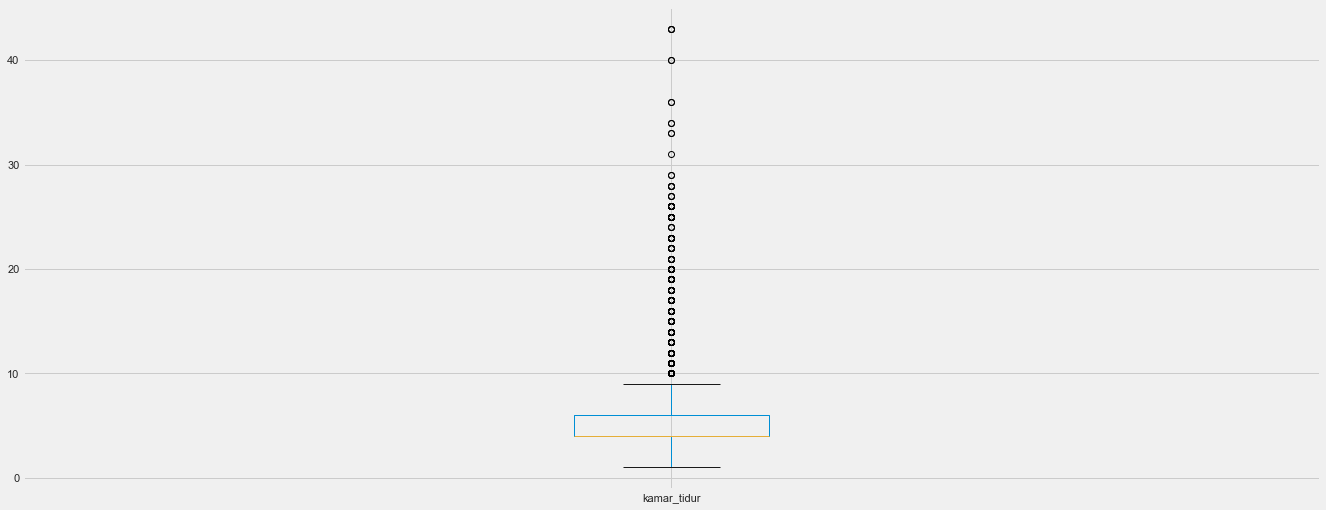

luas_bangunan


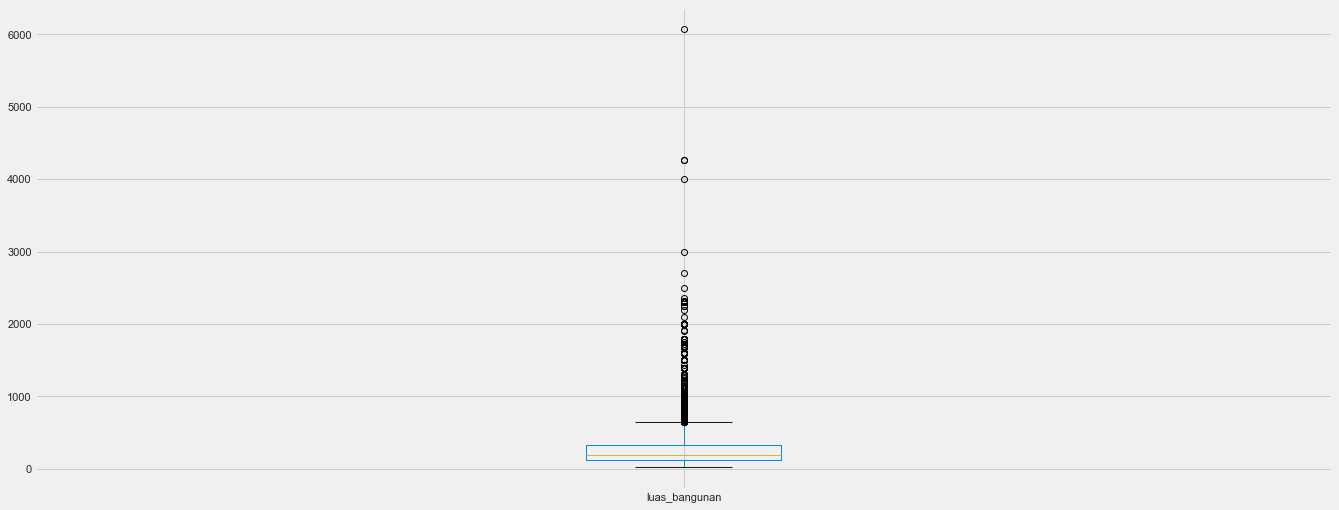

luas_tanah


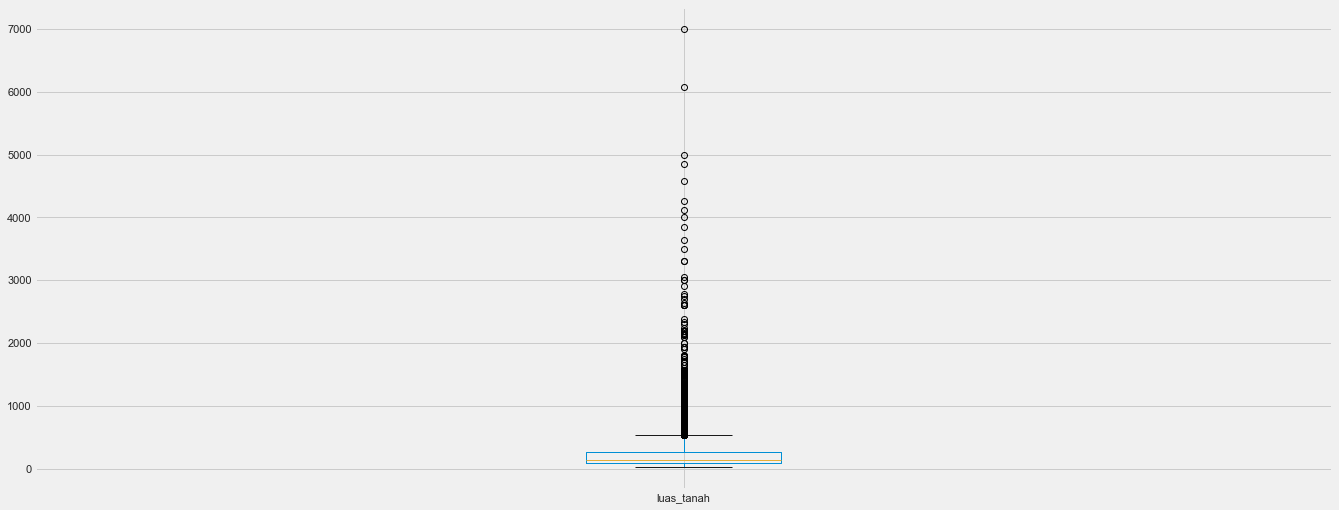

harga


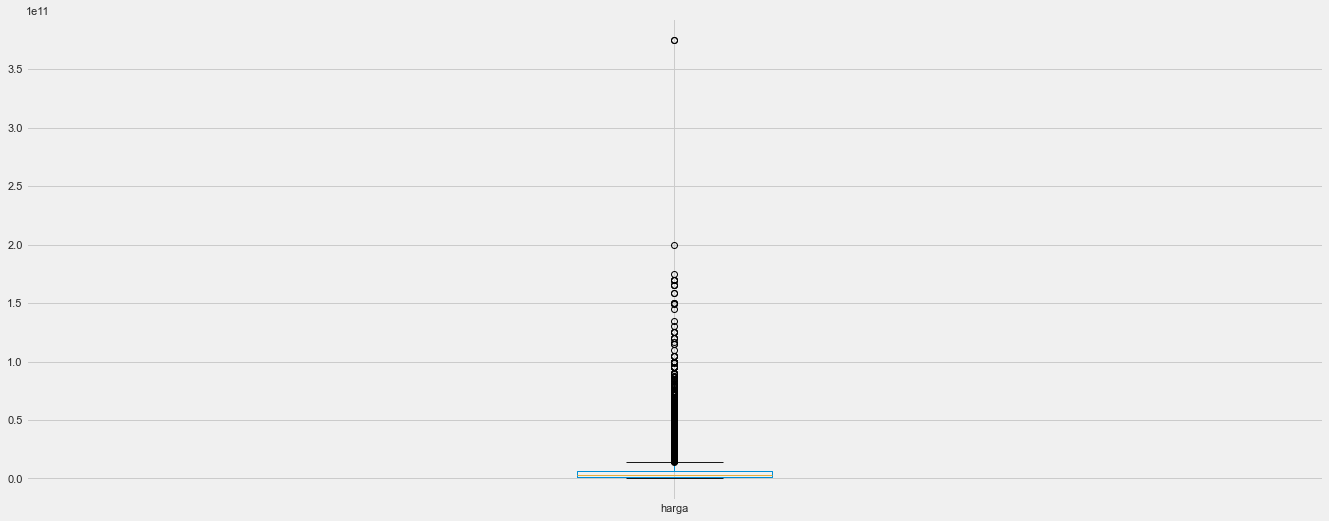

jumlah_lantai


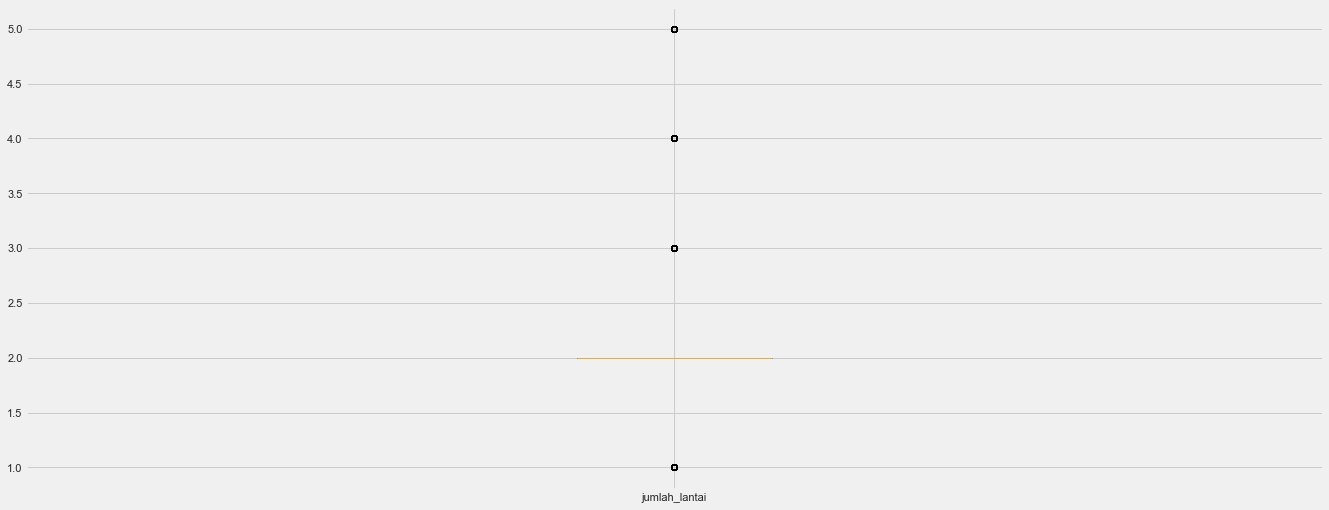

listrik


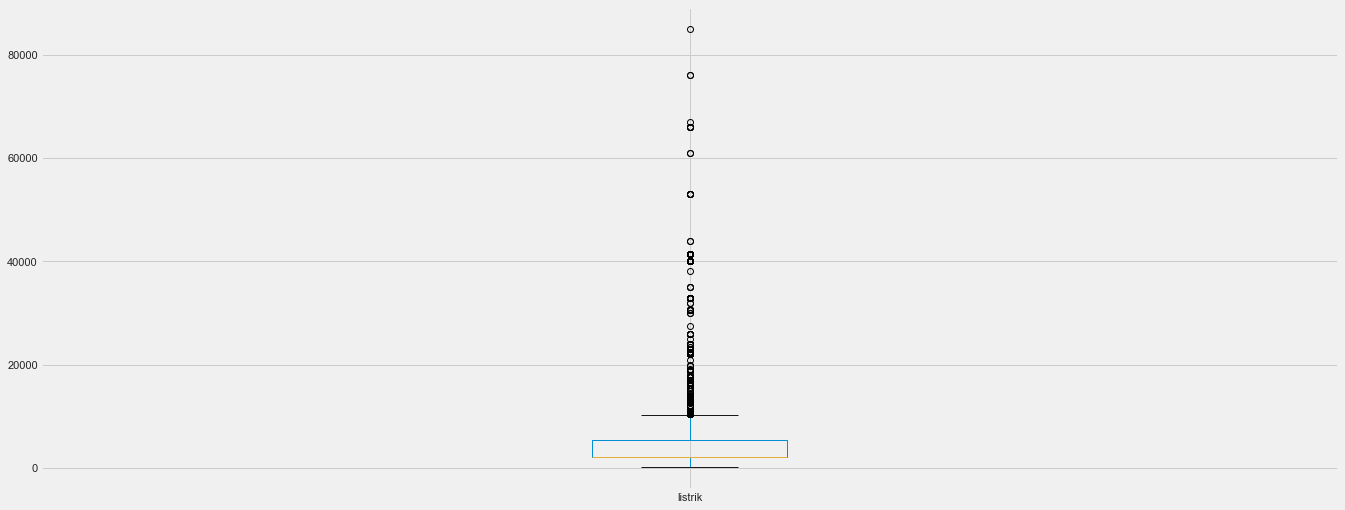

In [7]:
for i in num:
    print(i)
    df[i].plot.box()
    plt.show()
    

kecamatan


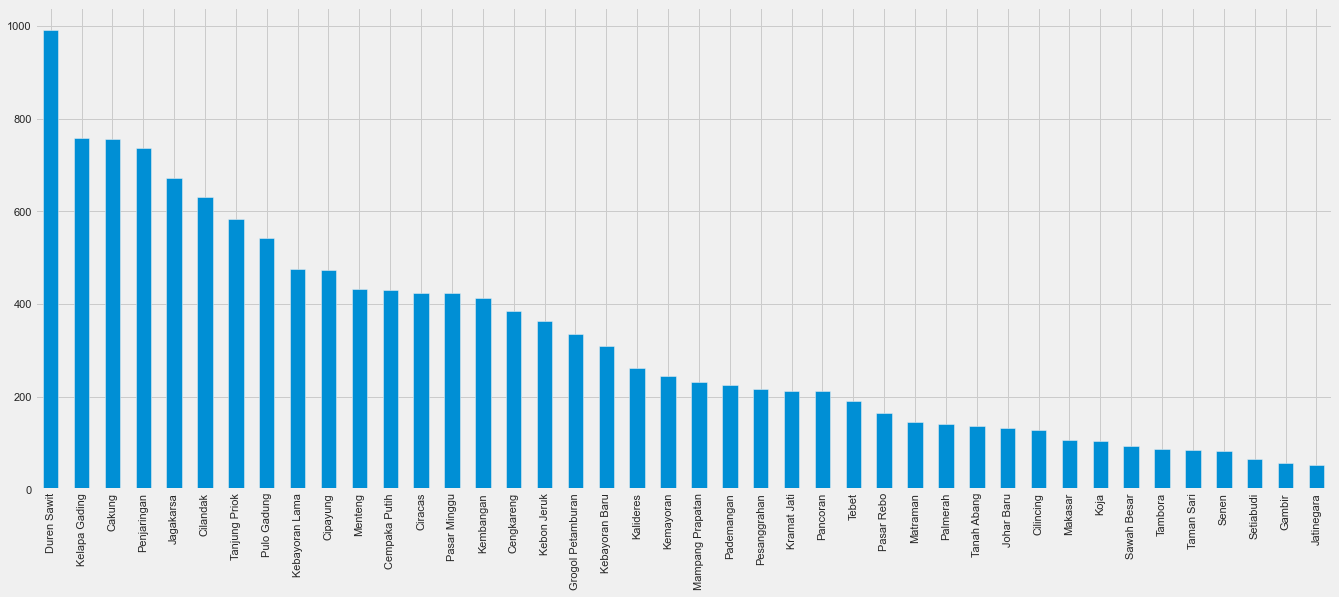

garasi


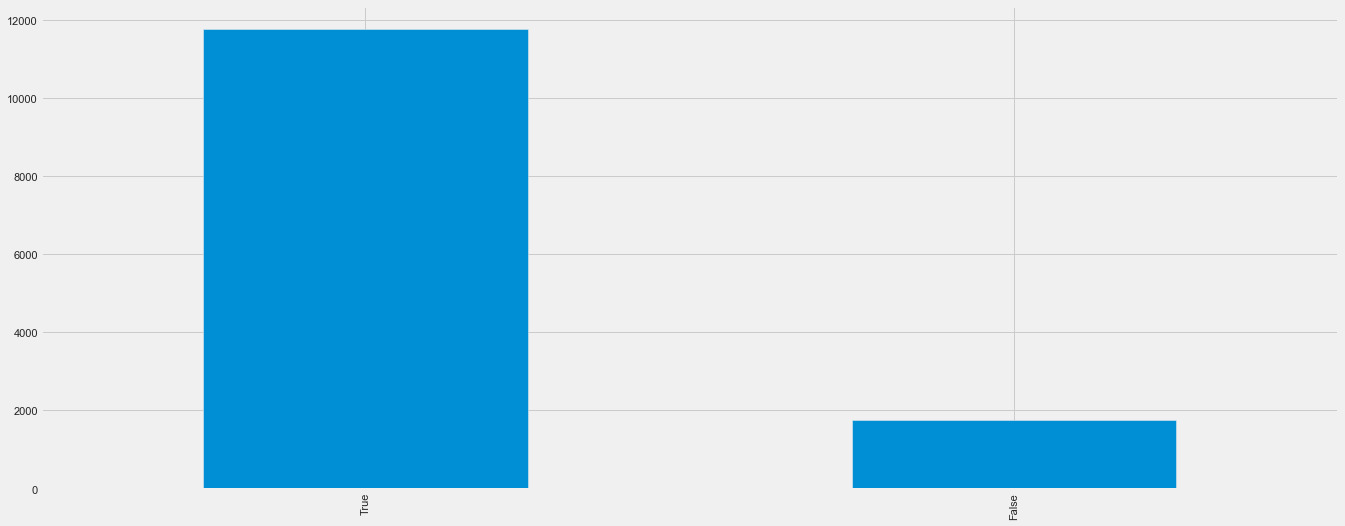

kolam_renang


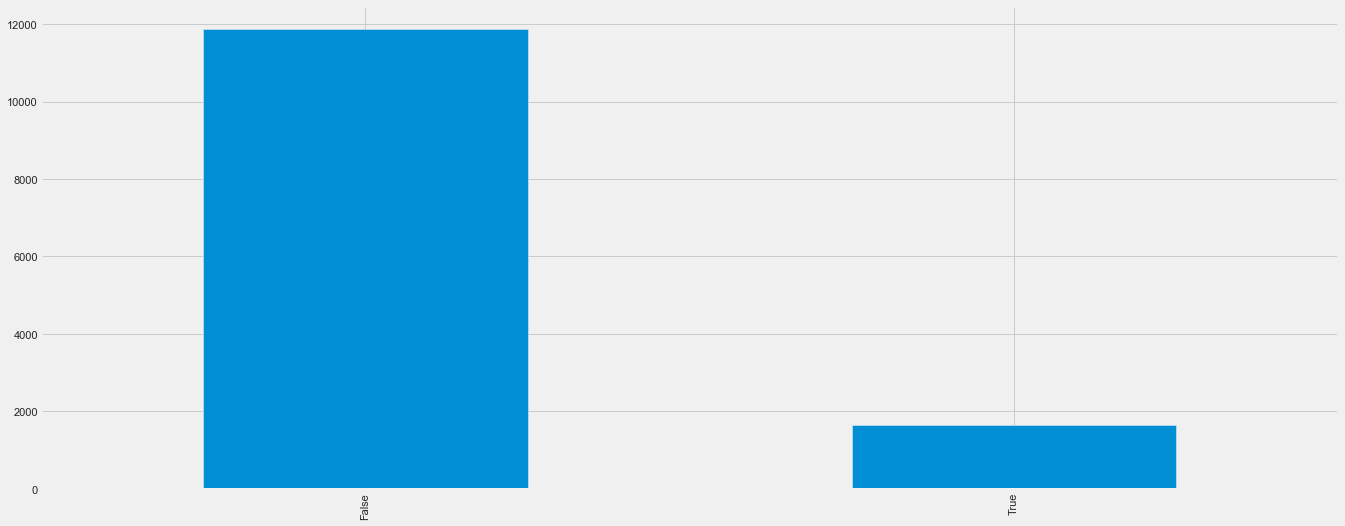

taman


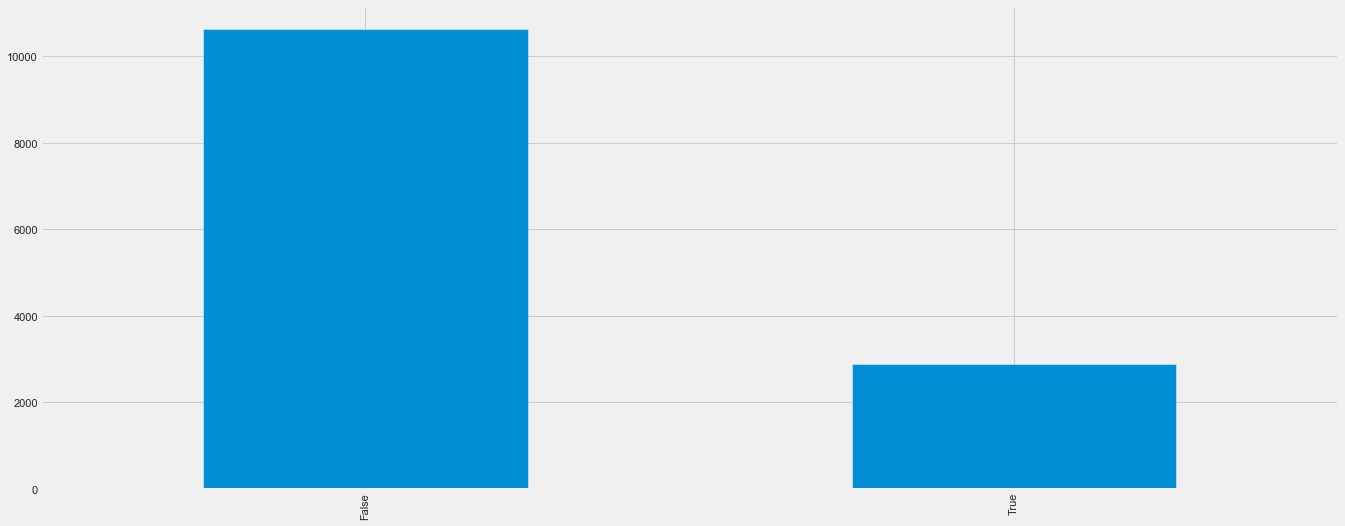

gym


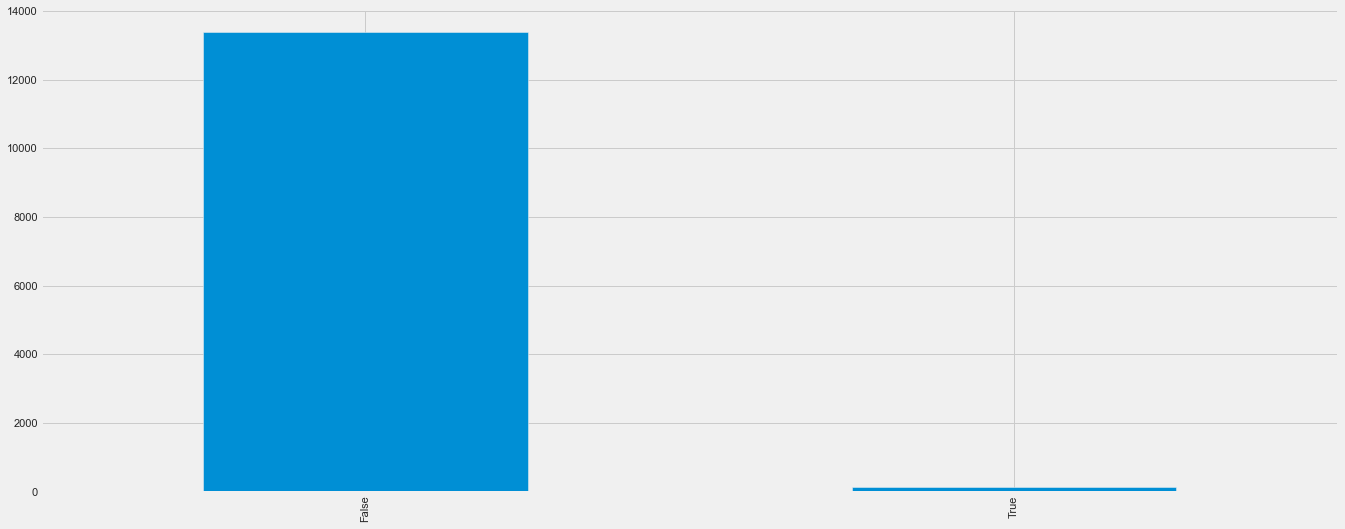

In [8]:
for i in cat:
    print(i)
    df[i].value_counts().plot.bar()
    plt.show()
    

In [9]:
# for i in cat:
#     print(i)
#     df.groupby(i)['harga'].plot.kde()
#     plt.show()

<AxesSubplot:>

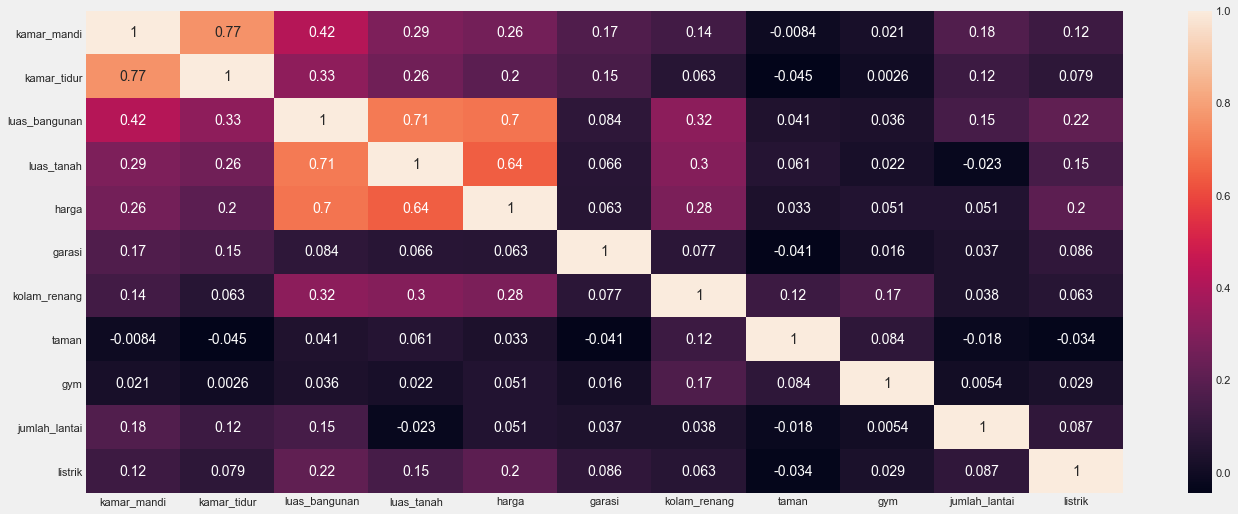

In [10]:
sns.heatmap(df.corr(), annot = True)

In [11]:
from scipy import stats
lokasi = [i for i in df['kecamatan'].unique()]
pair = {}
for i in lokasi:
    for j in lokasi:
        if j!=i:
            ttest = stats.ttest_ind(a = df[df['kecamatan'] == i]['harga'],
                                    b = df[df['kecamatan'] == j]['harga'])
            p_value = ttest.pvalue
            pair[f'{i} - {j}'] = p_value
    lokasi.remove(i)

In [12]:
count = 0
for i,j in pair.items():
    if j >= 0.05:
        count += 1
print(count, len(pair))

126 651


In [13]:
for i,j in pair.items():
    if j >= 0.05:
        print(i)

Kebayoran Baru - Kebayoran Lama
Kebayoran Baru - Setiabudi
Tebet - Cilandak
Tebet - Pasar Minggu
Tebet - Jatinegara
Tebet - Senen
Tebet - Gambir
Tebet - Palmerah
Kebayoran Lama - Setiabudi
Tanjung Priok - Pesanggrahan
Tanjung Priok - Pademangan
Tanjung Priok - Matraman
Tanjung Priok - Jatinegara
Tanjung Priok - Senen
Tanjung Priok - Kemayoran
Tanjung Priok - Sawah Besar
Tanjung Priok - Kebon Jeruk
Tanjung Priok - Taman Sari
Tanjung Priok - Tambora
Kelapa Gading - Pesanggrahan
Kelapa Gading - Pademangan
Kelapa Gading - Pulo Gadung
Kelapa Gading - Jatinegara
Kelapa Gading - Senen
Kelapa Gading - Cempaka Putih
Kelapa Gading - Sawah Besar
Kelapa Gading - Palmerah
Kelapa Gading - Kembangan
Kelapa Gading - Kebon Jeruk
Kelapa Gading - Taman Sari
Kelapa Gading - Tambora
Pademangan - Pesanggrahan
Pademangan - Pulo Gadung
Pademangan - Jatinegara
Pademangan - Senen
Pademangan - Kemayoran
Pademangan - Cempaka Putih
Pademangan - Sawah Besar
Pademangan - Johar Baru
Pademangan - Palmerah
Pademangan -

### KMeans Clustering

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    13514 non-null  int64  
 1   kamar_tidur    13514 non-null  int64  
 2   luas_bangunan  13514 non-null  float64
 3   luas_tanah     13514 non-null  float64
 4   harga          13514 non-null  float64
 5   kecamatan      13514 non-null  object 
 6   garasi         13514 non-null  bool   
 7   kolam_renang   13514 non-null  bool   
 8   taman          13514 non-null  bool   
 9   gym            13514 non-null  bool   
 10  jumlah_lantai  13514 non-null  int64  
 11  listrik        13514 non-null  float64
dtypes: bool(4), float64(4), int64(3), object(1)
memory usage: 897.5+ KB


In [15]:
# !pip install feature_engine
from feature_engine.encoding import DecisionTreeEncoder as dte

In [16]:
X = df.copy()
encoding = dte(encoding_method='ordered', regression=True)
encoding.fit(X=X[['kecamatan']], y=X['harga'])

DecisionTreeEncoder(encoding_method='ordered',
                    param_grid={'max_depth': [1, 2, 3, 4]},
                    variables=['kecamatan'])

In [17]:
X['kecamatan'] = encoding.transform(X[['kecamatan']])

In [18]:
X.head()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,kecamatan,garasi,kolam_renang,taman,gym,jumlah_lantai,listrik
0,5,6,353.0,155.0,6.700000e+09,8.969775e+09,True,True,False,False,2,6600.0
1,4,4,90.0,60.0,1.299000e+09,8.969775e+09,True,False,False,False,2,2200.0
2,4,6,160.0,109.0,2.300000e+09,2.264125e+10,True,False,False,False,2,3500.0
3,3,4,125.0,72.0,3.149480e+09,8.969775e+09,True,False,True,False,2,2200.0
4,3,4,90.0,87.0,1.210000e+09,3.748208e+09,True,True,False,False,2,2200.0


In [19]:
#### KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [20]:
ssd = []
for k in range(2,20):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
ssd

[133107.27899957585,
 119908.67019282664,
 106688.21923739916,
 99485.69055283118,
 87182.63287343003,
 78816.15331853085,
 70679.70720168157,
 65701.23353788753,
 61541.34296435263,
 57821.36973244175,
 55128.44709539532,
 53269.61446492446,
 51578.18300241403,
 49954.67318986109,
 48078.15680453206,
 46268.09000225998,
 45250.24704342079,
 44183.441728360594]

Text(0, 0.5, ' Sum of Squared Distances')

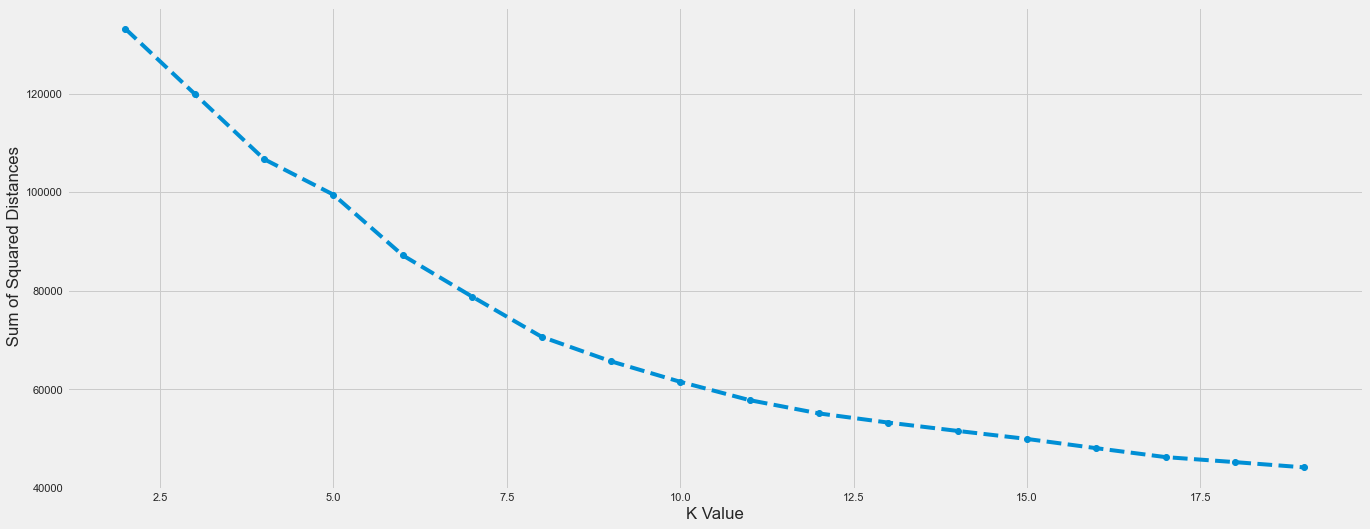

In [21]:
plt.plot(range(2,20),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [22]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0              NaN
1    -13198.608807
2    -13220.450955
3     -7202.528685
4    -12303.057679
5     -8366.479555
6     -8136.446117
7     -4978.473664
8     -4159.890574
9     -3719.973232
10    -2692.922637
11    -1858.832630
12    -1691.431463
13    -1623.509813
14    -1876.516385
15    -1810.066802
16    -1017.842959
17    -1066.805315
dtype: float64

In [23]:
model = KMeans(n_clusters=3, random_state=42)
clusters_labels = model.fit_predict(scaled_X)
# X['Clusters'] = clusters_labels
# X['Clusters'].value_counts()

In [24]:
# X = scaler.inverse_transform(X)

In [25]:
df['Clusters'] = clusters_labels

In [26]:
df

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,kecamatan,garasi,kolam_renang,taman,gym,jumlah_lantai,listrik,Clusters
0,5,6,353.0,155.0,6.700000e+09,Mampang Prapatan,True,True,False,False,2,6600.0,0
1,4,4,90.0,60.0,1.299000e+09,Cilandak,True,False,False,False,2,2200.0,0
2,4,6,160.0,109.0,2.300000e+09,Kebayoran Baru,True,False,False,False,2,3500.0,0
3,3,4,125.0,72.0,3.149480e+09,Mampang Prapatan,True,False,True,False,2,2200.0,0
4,3,4,90.0,87.0,1.210000e+09,Jagakarsa,True,True,False,False,2,2200.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,5,5,350.0,250.0,3.800000e+09,Koja,True,False,False,False,2,2200.0,0
13510,5,5,250.0,320.0,8.800000e+09,Koja,True,False,False,False,1,2200.0,0
13511,6,6,250.0,173.0,2.950000e+09,Koja,True,False,False,False,1,2200.0,0
13512,5,5,97.0,75.0,1.750000e+09,Koja,True,False,False,False,1,2200.0,0


In [27]:
df[df['Clusters'] == 0][num].describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,jumlah_lantai,listrik
count,9961.000000,9961.000000,9961.000000,9961.000000,9.961000e+03,9961.000000,9961.000000
mean,3.703142,4.677743,203.316133,166.969581,3.765117e+09,2.004819,5553.897801
std,1.288238,1.654359,128.167333,123.756725,3.405474e+09,0.631007,8423.904045
min,1.000000,1.000000,21.000000,22.000000,1.300000e+08,1.000000,130.000000
25%,3.000000,4.000000,110.000000,90.000000,1.500150e+09,2.000000,2200.000000
50%,4.000000,4.000000,170.000000,128.000000,2.650000e+09,2.000000,2200.000000
75%,4.000000,5.000000,260.000000,205.000000,4.800000e+09,2.000000,4400.000000
max,14.000000,22.000000,1050.000000,1800.000000,3.300000e+10,5.000000,41500.000000


In [28]:
df[df['Clusters'] == 0][cat].describe()

,kecamatan,garasi,kolam_renang,taman,gym
count,9961,9961,9961,9961,9961
unique,42,1,2,2,2
top,Duren Sawit,True,False,False,False
freq,874,9961,9289,8012,9882


In [29]:
df[df['Clusters'] == 1][num].describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,jumlah_lantai,listrik
count,1883.000000,1883.000000,1883.000000,1883.00000,1.883000e+03,1883.000000,1883.000000
mean,6.424323,7.587361,712.818375,691.96495,2.960742e+10,2.111524,9580.886352
std,3.693488,4.873336,419.194836,514.92642,2.755837e+10,0.709949,10563.888890
min,1.000000,1.000000,50.000000,48.00000,1.050000e+09,1.000000,130.000000
25%,4.000000,5.000000,459.500000,405.00000,1.300000e+10,2.000000,2200.000000
50%,6.000000,6.000000,600.000000,586.00000,2.100000e+10,2.000000,5500.000000
75%,7.000000,8.000000,823.500000,842.00000,3.800000e+10,2.000000,13000.000000
max,29.000000,43.000000,6075.000000,7000.00000,3.750000e+11,5.000000,76000.000000


In [30]:
df[df['Clusters'] ==1][cat].describe()

,kecamatan,garasi,kolam_renang,taman,gym
count,1883,1883,1883,1883,1883
unique,41,2,2,2,2
top,Menteng,True,False,False,False
freq,372,1799,987,1374,1841


In [31]:
df[df['Clusters'] == 2][num].describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,jumlah_lantai,listrik
count,1670.000000,1670.000000,1670.000000,1670.000000,1.670000e+03,1670.000000,1670.000000
mean,2.786826,3.580838,185.605389,157.470659,3.575296e+09,1.934132,3370.317365
std,1.180049,1.442027,139.339865,137.968962,4.161887e+09,0.615729,3250.355701
min,1.000000,1.000000,21.000000,22.000000,5.500000e+07,1.000000,220.000000
25%,2.000000,3.000000,100.000000,84.000000,1.500000e+09,2.000000,2200.000000
50%,3.000000,3.000000,150.000000,120.000000,2.295000e+09,2.000000,2200.000000
75%,3.000000,4.000000,230.000000,192.000000,4.100000e+09,2.000000,4400.000000
max,11.000000,20.000000,1200.000000,2200.000000,5.800000e+10,5.000000,85000.000000


In [32]:
df[df['Clusters'] == 2][cat].describe()

,kecamatan,garasi,kolam_renang,taman,gym
count,1670,1670,1670,1670,1670
unique,41,1,2,2,2
top,Ciracas,False,False,False,False
freq,156,1670,1593,1238,1661


In [33]:
C0 = [df[df['Clusters'] == 0]['harga'].mean(), df[df['Clusters'] == 0]['harga'].median()]
C1 = [df[df['Clusters'] == 1]['harga'].mean(), df[df['Clusters'] == 1]['harga'].median()]
C2 = [df[df['Clusters'] == 2]['harga'].mean(), df[df['Clusters'] == 2]['harga'].median()]
print(C0,C1,C2,sep='\n')

[3765117494.8809357, 2650000000.0]
[29607415347.848644, 21000000000.0]
[3575296227.5443115, 2295000000.0]


In [34]:
pd.DataFrame([C0,C1,C2])

,0,1
0,3.765117e+09,2.650000e+09
1,2.960742e+10,2.100000e+10
2,3.575296e+09,2.295000e+09


In [35]:
df['Clusters'].value_counts()

0    9961
1    1883
2    1670
Name: Clusters, dtype: int64

In [36]:
df.corr()['Clusters'][:-1].sort_values()

garasi          -0.868872
listrik         -0.015444
jumlah_lantai   -0.011124
gym              0.010629
kamar_tidur      0.016496
kamar_mandi      0.034353
taman            0.066403
kolam_renang     0.134712
luas_tanah       0.213382
luas_bangunan    0.216683
harga            0.222463
Name: Clusters, dtype: float64

<AxesSubplot:>

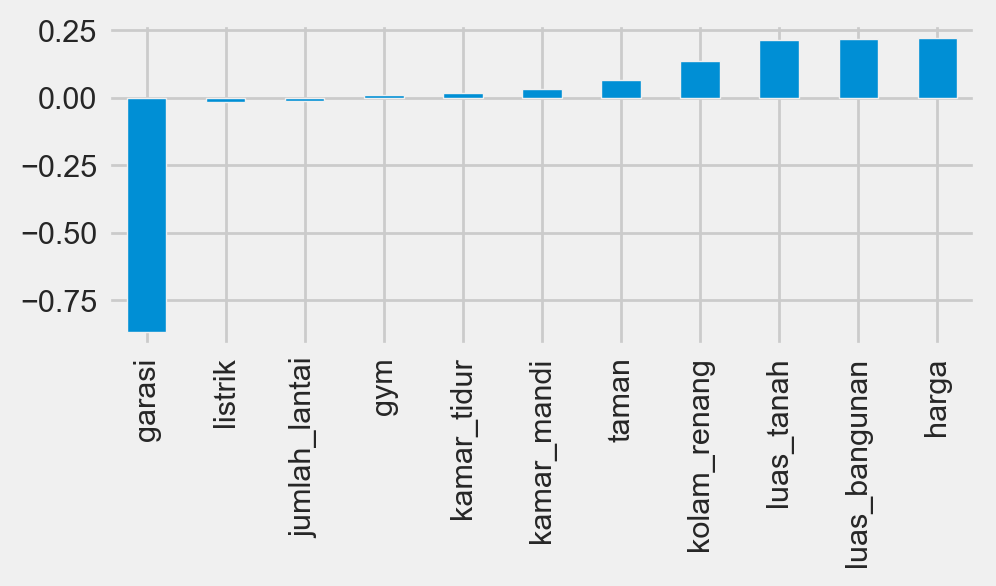

In [37]:
plt.figure(figsize=(5,2), dpi=200)
df.corr()['Clusters'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='luas_bangunan', ylabel='harga'>

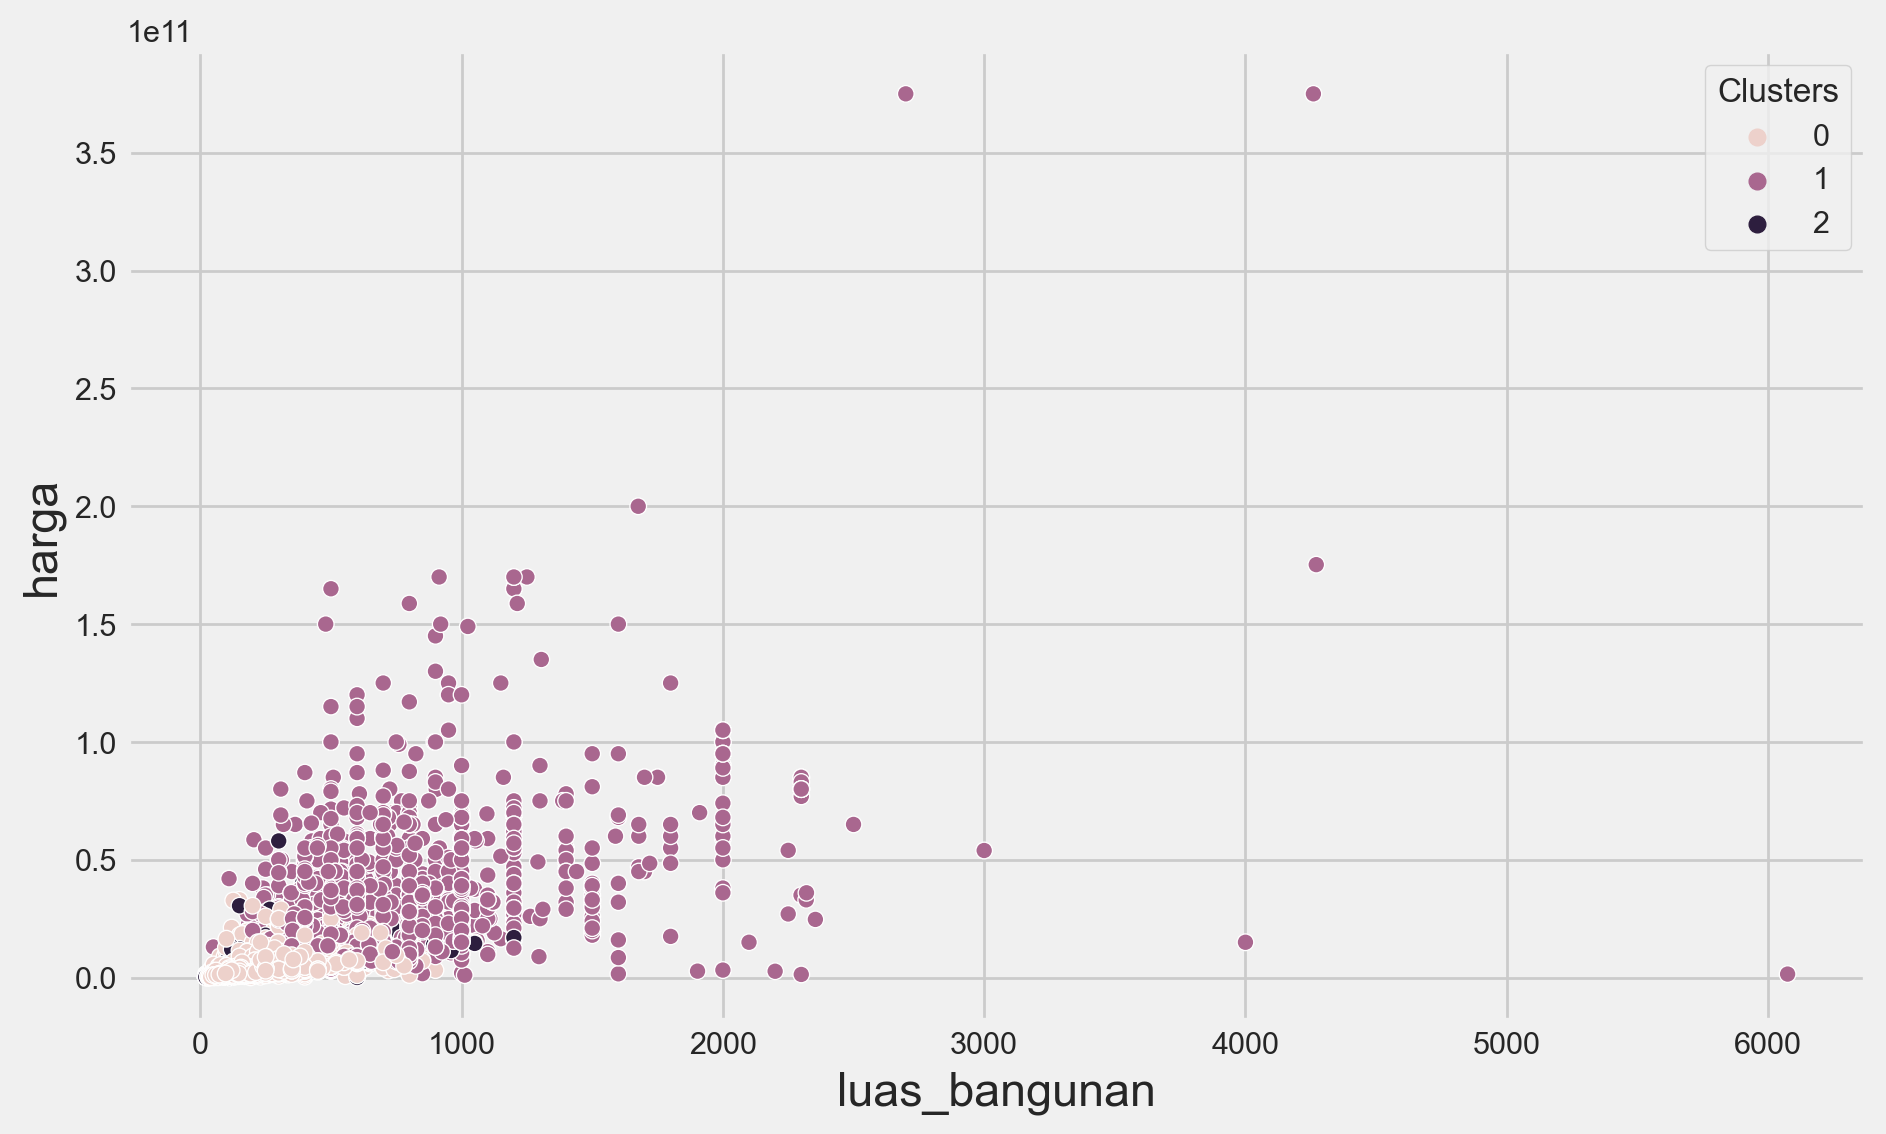

In [38]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='luas_bangunan',y='harga',hue=df['Clusters'])

<AxesSubplot:xlabel='luas_tanah', ylabel='harga'>

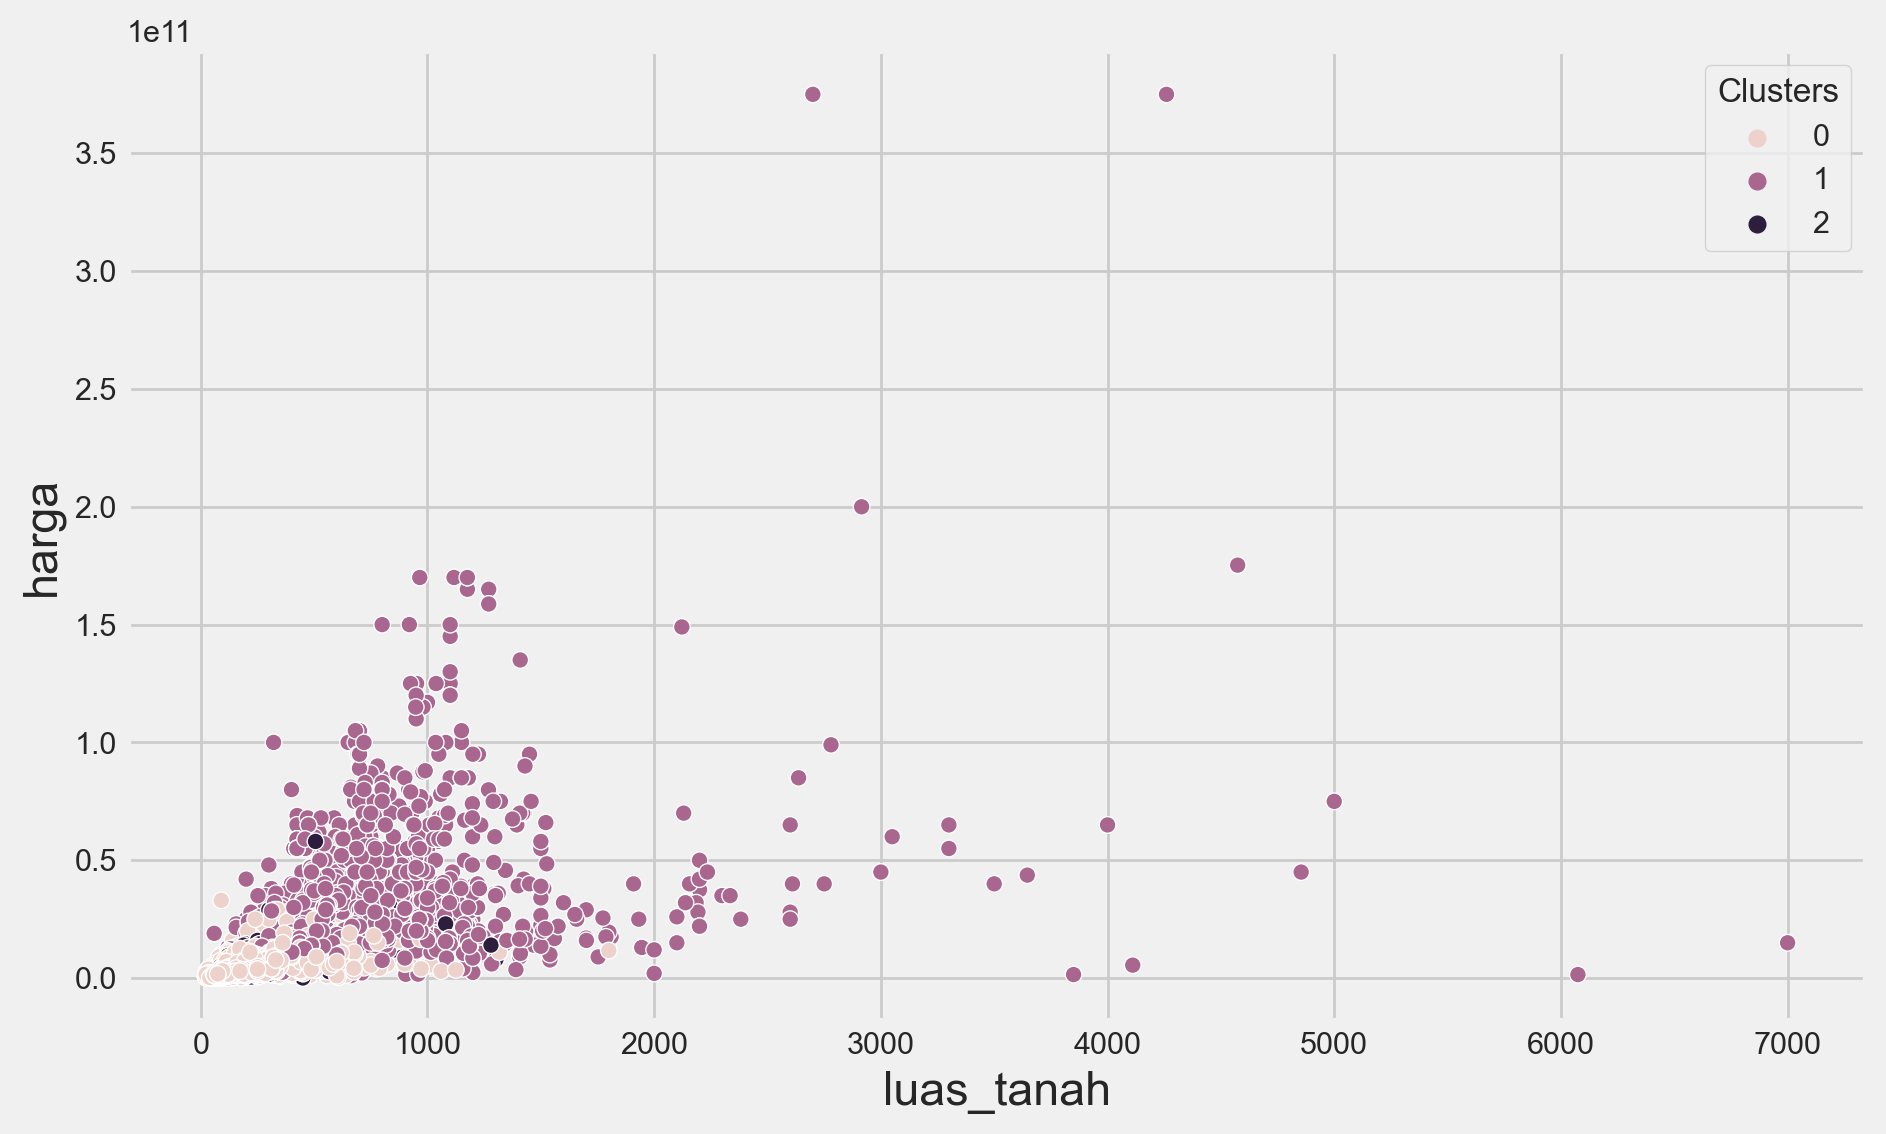

In [39]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='luas_tanah',y='harga',hue=df['Clusters'])

<AxesSubplot:xlabel='garasi', ylabel='harga'>

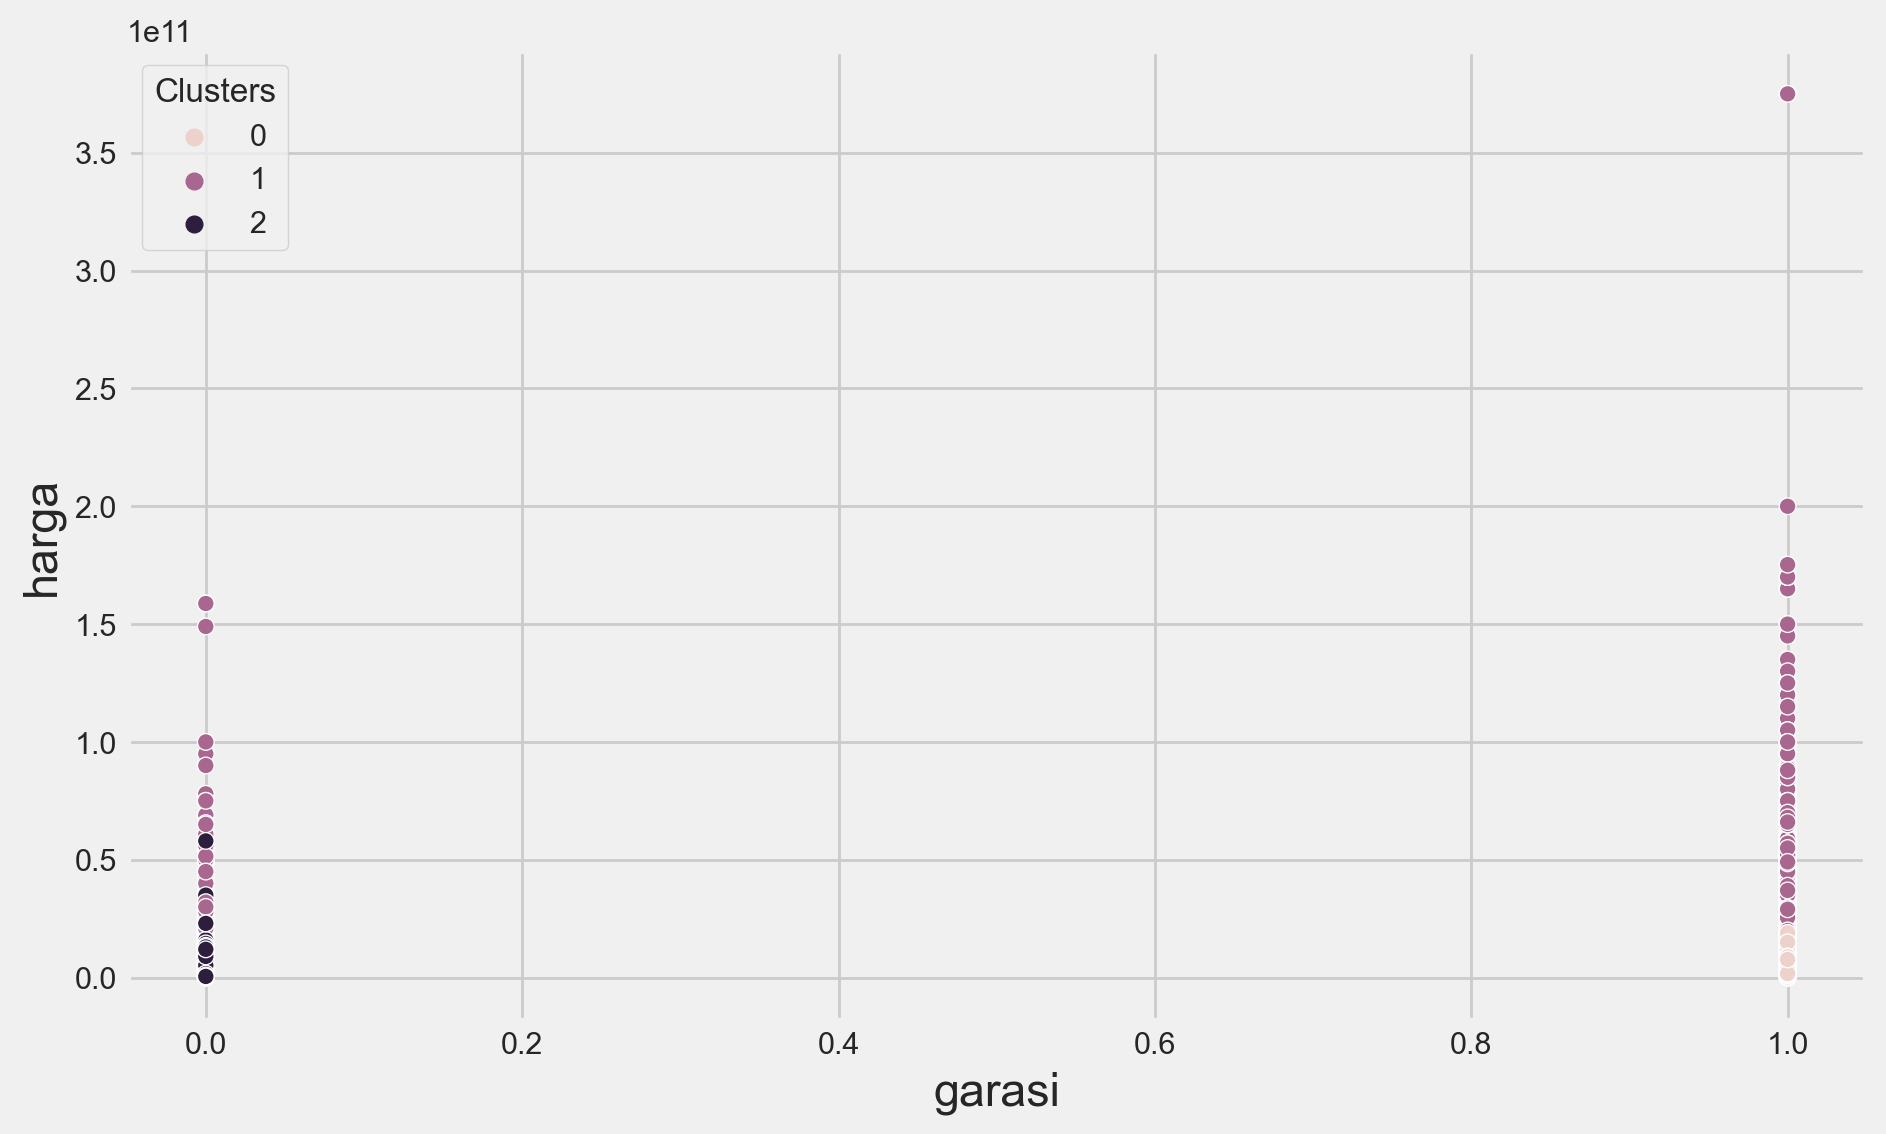

In [40]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='garasi',y='harga',hue=df['Clusters'])

#### $k=2$

In [41]:
model = KMeans(n_clusters=2, random_state=42)
clusters_labels = model.fit_predict(scaled_X)

In [42]:
# X = scaler.inverse_transform(X)
df['Clusters_k2'] = clusters_labels

In [43]:
df

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,kecamatan,garasi,kolam_renang,taman,gym,jumlah_lantai,listrik,Clusters,Clusters_k2
0,5,6,353.0,155.0,6.700000e+09,Mampang Prapatan,True,True,False,False,2,6600.0,0,0
1,4,4,90.0,60.0,1.299000e+09,Cilandak,True,False,False,False,2,2200.0,0,0
2,4,6,160.0,109.0,2.300000e+09,Kebayoran Baru,True,False,False,False,2,3500.0,0,0
3,3,4,125.0,72.0,3.149480e+09,Mampang Prapatan,True,False,True,False,2,2200.0,0,0
4,3,4,90.0,87.0,1.210000e+09,Jagakarsa,True,True,False,False,2,2200.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,5,5,350.0,250.0,3.800000e+09,Koja,True,False,False,False,2,2200.0,0,0
13510,5,5,250.0,320.0,8.800000e+09,Koja,True,False,False,False,1,2200.0,0,0
13511,6,6,250.0,173.0,2.950000e+09,Koja,True,False,False,False,1,2200.0,0,0
13512,5,5,97.0,75.0,1.750000e+09,Koja,True,False,False,False,1,2200.0,0,0


In [44]:
df['Clusters_k2'].value_counts()

0    11432
1     2082
Name: Clusters_k2, dtype: int64

In [45]:
df['Clusters'].value_counts()

0    9961
1    1883
2    1670
Name: Clusters, dtype: int64

In [46]:
df[df['Clusters_k2'] == 0][num].describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,jumlah_lantai,listrik
count,11432.000000,11432.000000,11432.000000,11432.000000,1.143200e+04,11432.000000,11432.000000
mean,3.545749,4.491777,195.798635,160.999388,3.586622e+09,1.989853,5181.963436
std,1.286188,1.621989,122.889869,116.623703,3.222545e+09,0.624551,7901.640080
min,1.000000,1.000000,21.000000,22.000000,5.500000e+07,1.000000,130.000000
25%,3.000000,3.000000,108.000000,90.000000,1.500000e+09,2.000000,2200.000000
50%,3.000000,4.000000,160.000000,125.000000,2.500000e+09,2.000000,2200.000000
75%,4.000000,5.000000,250.000000,200.000000,4.500000e+09,2.000000,4400.000000
max,13.000000,22.000000,1050.000000,1800.000000,3.300000e+10,5.000000,85000.000000


In [49]:
df[df['Clusters_k2'] == 1][num].describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,jumlah_lantai,listrik
count,2082.000000,2082.000000,2082.000000,2082.000000,2.082000e+03,2082.000000,2082.000000
mean,6.293468,7.450528,691.191162,666.947646,2.796522e+10,2.126801,9486.747839
std,3.582601,4.747412,408.480464,502.819137,2.678439e+10,0.721911,10408.479954
min,1.000000,1.000000,50.000000,36.000000,1.050000e+09,1.000000,130.000000
25%,4.000000,5.000000,450.000000,392.000000,1.200000e+10,2.000000,2200.000000
50%,5.000000,6.000000,600.000000,549.000000,1.950000e+10,2.000000,5500.000000
75%,7.000000,8.000000,800.000000,815.000000,3.500000e+10,2.000000,13000.000000
max,29.000000,43.000000,6075.000000,7000.000000,3.750000e+11,5.000000,76000.000000


In [53]:
(1.950000e+10 - 2.500000e+09)/1000_000_000

17.0

In [54]:
df[df['Clusters_k2'] == 0][cat].describe()

,kecamatan,garasi,kolam_renang,taman,gym
count,11432,11432,11432,11432,11432
unique,42,2,2,2,2
top,Duren Sawit,True,False,False,False
freq,938,9805,10756,9090,11346


In [55]:
df[df['Clusters_k2'] == 1][cat].describe()

,kecamatan,garasi,kolam_renang,taman,gym
count,2082,2082,2082,2082,2082
unique,41,2,2,2,2
top,Menteng,True,False,False,False
freq,388,1955,1113,1534,2038


In [63]:
df.drop(columns='Clusters').corr()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,garasi,kolam_renang,taman,gym,jumlah_lantai,listrik,Clusters_k2
kamar_mandi,1.000000,0.766901,0.422246,0.289523,0.263958,0.174917,0.137098,-0.008437,0.020703,0.178948,0.122502,0.475074
kamar_tidur,0.766901,1.000000,0.330197,0.255622,0.200079,0.154531,0.062680,-0.045249,0.002555,0.119028,0.078660,0.408506
luas_bangunan,0.422246,0.330197,1.000000,0.708488,0.697491,0.083872,0.323422,0.040855,0.036121,0.148285,0.215437,0.673783
luas_tanah,0.289523,0.255622,0.708488,1.000000,0.644815,0.065768,0.303317,0.060521,0.022087,-0.023350,0.150235,0.630964
harga,0.263958,0.200079,0.697491,0.644815,1.000000,0.063437,0.284172,0.032984,0.051423,0.051010,0.204835,0.627497
garasi,0.174917,0.154531,0.083872,0.065768,0.063437,1.000000,0.077109,-0.040760,0.015504,0.037433,0.086018,0.087354
kolam_renang,0.137098,0.062680,0.323422,0.303317,0.284172,0.077109,1.000000,0.119891,0.167348,0.038396,0.063021,0.448583
taman,-0.008437,-0.045249,0.040855,0.060521,0.032984,-0.040760,0.119891,1.000000,0.083571,-0.018444,-0.033713,0.051370
gym,0.020703,0.002555,0.036121,0.022087,0.051423,0.015504,0.167348,0.083571,1.000000,0.005401,0.028888,0.050341
jumlah_lantai,0.178948,0.119028,0.148285,-0.023350,0.051010,0.037433,0.038396,-0.018444,0.005401,1.000000,0.087363,0.076964


In [64]:
df.drop(columns='Clusters').corr()['Clusters_k2'][:-1].sort_values(ascending=False)

luas_bangunan    0.673783
luas_tanah       0.630964
harga            0.627497
kamar_mandi      0.475074
kolam_renang     0.448583
kamar_tidur      0.408506
listrik          0.183263
garasi           0.087354
jumlah_lantai    0.076964
taman            0.051370
gym              0.050341
Name: Clusters_k2, dtype: float64

<AxesSubplot:>

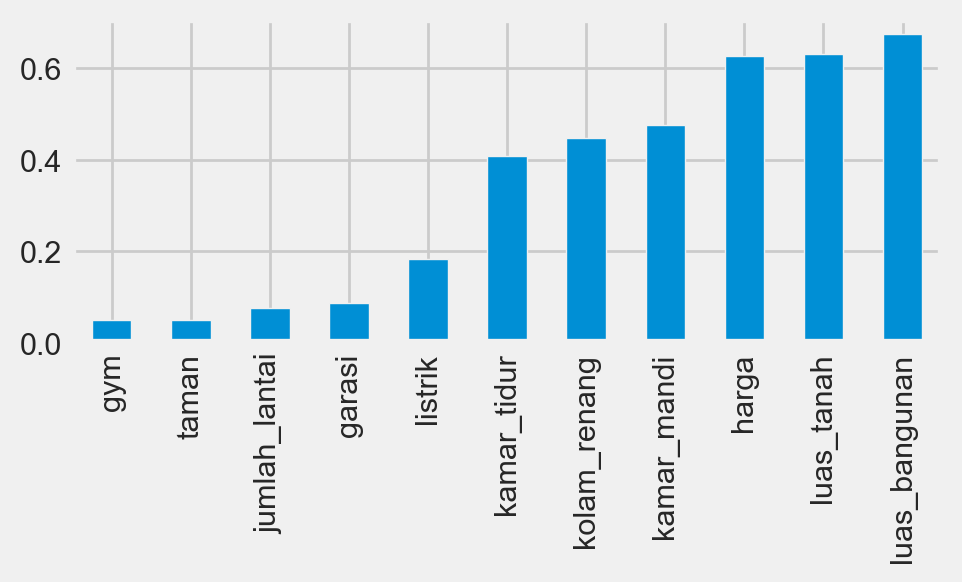

In [65]:
plt.figure(figsize=(5,2), dpi=200)
df.drop(columns='Clusters').corr()['Clusters_k2'][:-1].sort_values().plot(kind='bar')